In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston # boston house price set 로드
from sklearn.linear_model import LinearRegression, Lasso, Ridge # 선형, 라소, 릿지 모델 로드
from sklearn.model_selection import train_test_split # 데이터 셋을 훈련용, 테스트 용으로 나누는 함수 로드
import pandas as pd # 데이터 셋을 다루기 위한 pandas 라이브러리 로드
import seaborn as sns # 그래프 라이브러리 로드

In [3]:
boston = load_boston()
print(type(boston))

<class 'sklearn.utils.Bunch'>


In [4]:
X = boston.data # data 
y = boston.target # target
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### 선형 회귀 이용
* 하이퍼파라미터 설정 불가능. => 다양한 시도 불가능.
* 특성이 많아지면 과대적합 발생.

In [5]:
# 훈련, 테스트 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# R2 평가지표 활용
model = LinearRegression().fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'훈련 : {train_score}')
print(f'훈련 : {test_score}')

훈련 : 0.748087259862344
훈련 : 0.6844267283527139


In [6]:
# 데이터 나누는 비율 조정해서 평가지표(정확도) 비교해보기.
for i in range(1,6):
    # 훈련, 테스트 데이터 나누기
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/10, random_state=42)
    # R2 평가지표 활용
    model = LinearRegression().fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f'훈련 : 테스트 = {10-i} : {i}')
    print(f'훈련 : {train_score}')
    print(f'훈련 : {test_score}')
    print()

훈련 : 테스트 = 9 : 1
훈련 : 0.7375152736886281
훈련 : 0.7598135533532432

훈련 : 테스트 = 8 : 2
훈련 : 0.7508856358979673
훈련 : 0.6687594935356365

훈련 : 테스트 = 7 : 3
훈련 : 0.7434997532004697
훈련 : 0.7112260057484878

훈련 : 테스트 = 6 : 4
훈련 : 0.747199884740759
훈련 : 0.7125140936111214

훈련 : 테스트 = 5 : 5
훈련 : 0.7719887864238001
훈련 : 0.6896917482875745



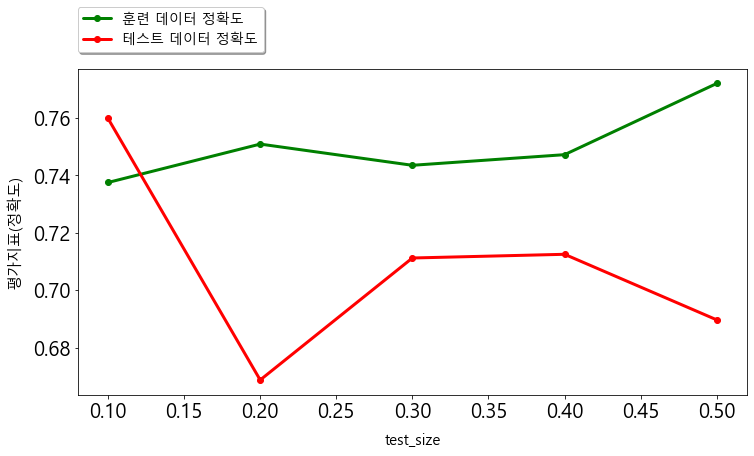

In [10]:
# 그래프 그리기
LR_test_size_list = []
LR_train_list = []
LR_test_list = []
for i in range(1,6):
    # 훈련, 테스트 데이터 나누기
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/10, random_state=42)
    # R2 평가지표 활용
    model = LinearRegression().fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    # 테스트 사이즈, 훈련 정확도, 테스트 정확도 리스트 만들기
    LR_test_size_list.append(i/10)
    LR_train_list.append(train_score)
    LR_test_list.append(test_score)


fig, ax = plt.subplots(figsize=(12,6)) # 그래프 크기, 축
ax.tick_params(labelsize=20) # 축 폰트 크기 조정
plt.xlabel('test_size', labelpad=10, fontdict={'size':15}) # x축 타이틀 padding과 폰트 크기 조정
plt.ylabel('평가지표(정확도)', labelpad=10, fontdict={'size':15}) # y축 타이틀 padding과 폰트 크기 조정
# x, y, 그래프 형태, 그래프 이름, 그래프 너비, 끝 부분 스타일 지정
plt.plot(LR_test_size_list, LR_train_list, "go-", label="훈련 데이터 정확도", linewidth=3, solid_capstyle='round')
plt.plot(LR_test_size_list, LR_test_list, "ro-", label="테스트 데이터 정확도", linewidth=3, solid_capstyle='round')
# 범례 표시. 한 행의 열 개수, 범례 위치(비율), 범례 테두리 설정, 그림자 설정
plt.legend(ncol=1, loc=(0,1.05), fontsize=14, frameon=True, shadow=True)
plt.show()

## 데이터 준비